<a href="https://colab.research.google.com/github/simran-padam/WorldHappinessCompetition/blob/main/World_Happiness_Report_sdp2158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **World Happiness Report**:
<ul type= "none">
  <li> The report attempts to predict Happiness using key variables such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and freedom from corruption. </li>
  <ul>
  <li>Name: Simran Padam </li>
  <li>UNI: sdp2158 </li>
  <li>Github repo link : https://github.com/simran-padam/WorldHappinessCompetition.git
  
 </li>
  </ul>





## **Instructions:**
1. Environment Setup and Data import
2. Exploratory Data Analysis & Bivariate Analysis
3. Feature selection
4. Preprocessing
5. Model training & Submissions



## 1. Setup and Data Import

In [2]:
#install aimodelshare library
%%capture
! pip install aimodelshare --upgrade

In [3]:
def warn(*args,**kwargs):pass
import warnings
warnings.warn=warn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

In [5]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [6]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [7]:
#X has 88 rows and 11 columns
#Y has 88 rows and 5 columns
X_train.shape, y_train.shape

((88, 11), (88, 5))

## 2a. Exploratory Data Analysis

### Basic data checks - missing values and univariate analysis 

In [8]:
X_train.isna().sum()

Country or region               0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
name                            0
region                          0
sub-region                      0
Terrorist_attacks               0
dtype: int64

In [9]:
X_train.drop(["Country or region", "name", "region", "sub-region"], axis=1).describe(percentiles=[0.1,0.2,0.5,0.75,0.9,0.95,0.99]).round(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
count,88.00,88.00,88.00,88.00,88.00,88.00,88.00
mean,0.92,1.21,0.75,0.38,0.18,0.12,296.72
std,0.41,0.29,0.24,0.16,0.10,0.10,764.35
min,0.03,0.00,0.10,0.00,0.00,0.00,1.00
10%,0.32,0.79,0.41,0.15,0.07,0.03,2.00
20%,0.53,1.05,0.51,0.23,0.10,0.04,3.00
50%,0.96,1.25,0.81,0.41,0.18,0.08,38.50
75%,1.25,1.46,0.90,0.49,0.24,0.15,125.61
90%,1.38,1.52,1.03,0.57,0.30,0.29,1354.63
95%,1.50,1.53,1.04,0.59,0.37,0.36,1419.10


#### **Comments**:
<ul type= "none">
  <li> The above table shows percentile distribution of continuous independent variables </li>
  <ul>
  <li> For terrorist attacks, we notice a huge difference between 99% and max - possibly an outlier. Checking further, this corresponds to one observation coming from country Afghanistan. </li>
  </ul>

### Pie chart of Target Variable (Happiness) & Region variable

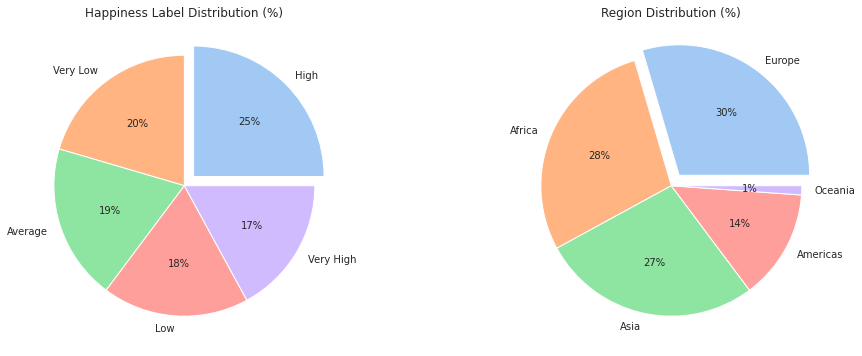

In [ ]:
t= pd.DataFrame(y_train_labels.value_counts())
t.rename({0: "Count of labels"}, axis=1)
r= pd.DataFrame(full_df["region"].value_counts())
r.rename({0: "Count of labels"}, axis=1)

fig,(ax1,ax2) = plt.subplots(1,2, figsize = (16,6));
colors = sns.color_palette('pastel')[0:5]
explode = [0.1, 0, 0, 0, 0]

ax1.pie(t, labels = t.index, colors = colors, explode=explode, autopct='%.0f%%')
ax1.set_title("Happiness Label Distribution (%)")


ax2.pie(r, labels = r.index, colors = colors, explode=explode, autopct='%.0f%%')
ax2.set_title("Region Distribution (%)")

plt.show()

#### **Comments**:
<ul type= "none">
  <li> </li>
  <ul>
  <li>We observe target variable is roughly balanced among different categories</li>
  <li> Europe has the max data points and Oceania lowest in the pie chart of region </li>
  </ul>

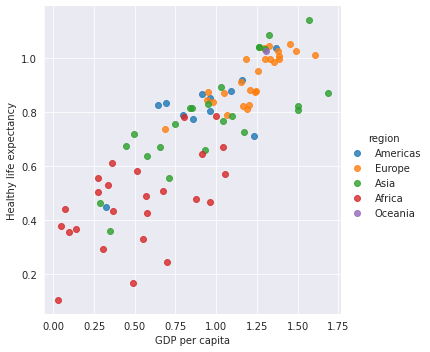

In [ ]:
sns.lmplot('GDP per capita','Healthy life expectancy', data=full_df, hue='region', fit_reg=False)
plt.show()

#### **Comments**:
<ul type= "none">
  <li>  The relationship between GDP and Health Life expectancy is linear, postive correlated. For eg:</li>
  <ul>
  <li> Africa (marked red,bottom left of the graph) indicating low GDP and low health life expectancy</li>
  <li> Europe (marked orange, top right of the graph) indicating high GDP and high health life expectancy </li>
  </ul>


## 2b. Bivariate Analysis

In [ ]:
y_train_df = pd.DataFrame(y_train_labels)
y_train_df = y_train_df.rename({0:"Happiness Label"},axis=1)
full_df= pd.merge(X_train,y_train_df,left_index=True, right_index= True)
full_df.head(2)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Happiness Label
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,Average
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,High


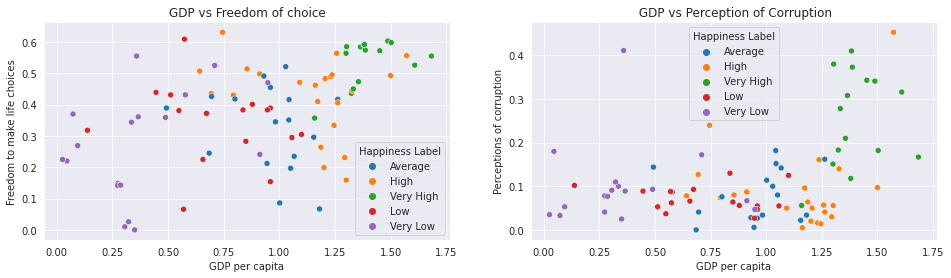

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (16,4));

sns.scatterplot(x= 'GDP per capita', y = 'Freedom to make life choices', data= full_df, hue= "Happiness Label",ax=ax[0]);

ax[0].set_title('GDP vs Freedom of choice');

sns.scatterplot(x= 'GDP per capita', y = 'Perceptions of corruption', data= full_df, hue= "Happiness Label",ax=ax[1]);

ax[1].set_title(' GDP vs Perception of Corruption');

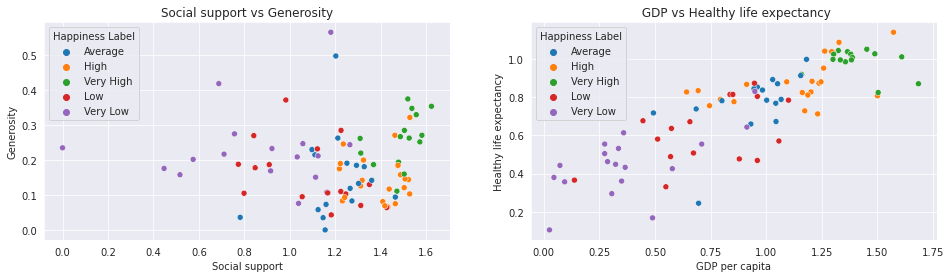

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (16,4));

sns.scatterplot(x= 'Social support', y = 'Generosity', data= full_df, hue= "Happiness Label",ax=ax[0]);

ax[0].set_title('Social support vs Generosity');

sns.scatterplot(x= 'GDP per capita', y = 'Healthy life expectancy', data= full_df, hue= "Happiness Label",ax=ax[1]);

ax[1].set_title(' GDP vs Healthy life expectancy');

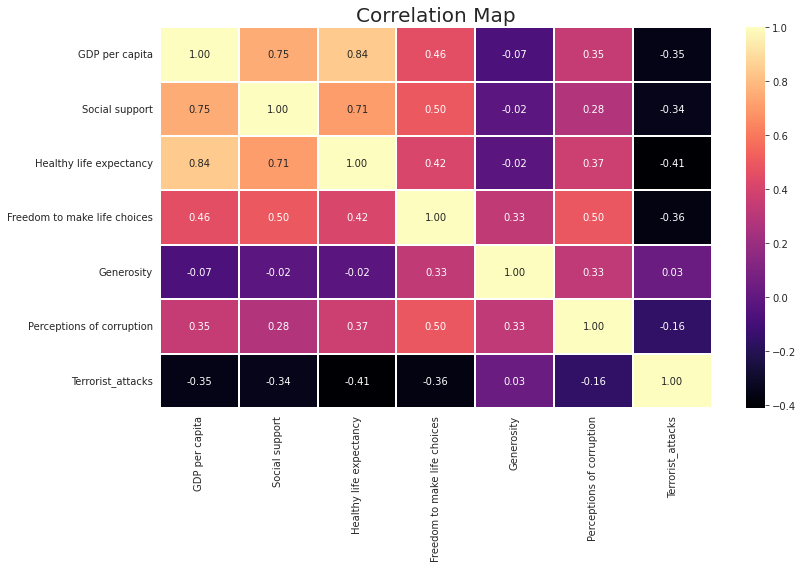

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data=X_train.iloc[:, 0:7].corr(), annot=True, cmap="magma", linewidth=1, fmt=".2f")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()

#### **Comments**:
<ul type= "none">
  <li>  Correlation matrix between independet variables</li>
  <ul>
  <li>GDP is highly correlated with social security and health life expectancy. </li>
  <li> Intuitively, Terrorist attacks is negatively correlated with other variables except Generosity - the correlation, however, is very small i.e. 0.03. </li>
  </ul>

## 3. Feature Selection

In [7]:
cat_list = ['region', 'sub-region']
X_train_cat = X_train.loc[:,cat_list]
X_train_cat_d = pd.get_dummies(X_train_cat, columns = cat_list, drop_first= False)
X_train_cat_d.shape

(88, 19)

In [8]:
X_train_num = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
X_train_num.shape

(88, 7)

In [9]:
X_train_final = pd.merge(X_train_num,X_train_cat_d,left_index=True, right_index= True)
X_train_final.shape

(88, 26)

In [10]:
X_train=X_train_final.copy()

In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(RandomForestClassifier(random_state=42))

rfe.fit(X_train, y_train_labels)
rfe_features = X_train.columns[rfe.support_]
print(f"===== {len(rfe_features)} features were selected =====")
print(f"{', '.join(rfe_features)}")

===== 13 features were selected =====
GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Terrorist_attacks, region_Africa, region_Asia, region_Europe, sub-region_Latin America and the Caribbean, sub-region_Southern Asia, sub-region_Sub-Saharan Africa


In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
rfe = RFE(GradientBoostingClassifier(random_state=42))

rfe.fit(X_train, y_train_labels)
rfe_features = X_train.columns[rfe.support_]
print(f"===== {len(rfe_features)} features were selected =====")
print(f"{', '.join(rfe_features)}")

===== 13 features were selected =====
GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Terrorist_attacks, region_Americas, region_Asia, sub-region_Latin America and the Caribbean, sub-region_Northern Africa, sub-region_Southern Asia, sub-region_Southern Europe


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=200, random_state=10)
sfm = SelectFromModel(clf)
sfm.fit(X_train, y_train_labels)
print(X_train.columns[sfm.get_support()])         

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Terrorist_attacks',
       'sub-region_Sub-Saharan Africa'],
      dtype='object')


## 4. Preprocessing

### Train set processing

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

numeric_features = X_train.iloc[:, 0:7]
numeric_features=numeric_features.columns.tolist()

scaler= MinMaxScaler() 
scaler.fit(X_train.iloc[:, 0:7])
scaled_df= scaler.transform(X_train.iloc[:, 0:7])
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns = numeric_features
scaled_df

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
0,0.563329,0.784483,0.722973,0.721078,0.146643,0.059603,0.002823
1,0.402895,0.815887,0.704633,0.689382,0.353357,0.280353,0.020693
2,0.696622,0.711823,0.862934,0.106181,0.000000,0.075055,0.018432
3,1.000000,0.808498,0.739382,0.879556,0.388693,0.368653,0.009355
4,0.433655,0.941502,0.628378,1.000000,0.568905,0.529801,0.020693
...,...,...,...,...,...,...,...
83,0.613993,0.802340,0.548263,0.659271,0.234982,0.335541,0.240286
84,0.555489,0.522167,0.742278,0.606973,0.314488,0.059603,0.001328
85,0.788299,0.947044,0.860039,0.713154,0.614841,0.613687,0.056128
86,0.604946,0.692734,0.760618,0.825674,0.102473,0.220751,0.005978


In [12]:
scaled_ohe_df= pd.merge(scaled_df,X_train.iloc[:,7:], left_index=True, right_index=True)
scaled_ohe_df.head(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,region_Africa,region_Americas,region_Asia,...,sub-region_Latin America and the Caribbean,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,0.563329,0.784483,0.722973,0.721078,0.146643,0.059603,0.002823,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0.402895,0.815887,0.704633,0.689382,0.353357,0.280353,0.020693,0,1,0,...,1,0,0,0,0,0,0,0,0,0


### Test set processing

In [13]:
cat_list = ['region', 'sub-region']
X_test_cat = X_test.loc[:,cat_list]
X_test_cat_d = pd.get_dummies(X_test_cat, columns = cat_list, drop_first= False)
X_test_cat_d.shape

(68, 19)

In [14]:
#using scaler from train
scaled_df_test=scaler.transform(X_test.loc[:,['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Terrorist_attacks',]])
scaled_df_test=pd.DataFrame(scaled_df_test)
scaled_df_test.columns = numeric_features
scaled_df_test

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
0,0.642943,0.931650,0.685328,0.492868,0.143110,0.008830,0.000996
1,0.589867,0.851601,0.722973,0.446910,0.242049,0.086093,0.000166
2,0.556092,0.942734,0.542471,0.502377,0.415194,0.083885,0.097050
3,0.596502,0.862685,0.650579,0.787639,0.199647,0.222958,0.000000
4,0.183957,0.650246,0.265444,0.404120,0.312721,0.249448,0.000996
...,...,...,...,...,...,...,...
63,0.811821,0.953202,0.898649,0.882726,0.586572,0.640177,0.000166
64,0.255730,0.698276,0.449807,0.462758,0.270318,0.158940,0.001162
65,0.099517,0.344828,0.376448,0.702060,0.385159,0.196468,0.235486
66,0.792521,0.977217,0.850386,0.944532,0.270318,0.867550,0.009355


In [15]:
X_test_final = pd.merge(scaled_df_test,X_test_cat_d,left_index=True, right_index= True)
X_test_final.head(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,region_Africa,region_Americas,region_Asia,...,sub-region_Latin America and the Caribbean,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,0.642943,0.931650,0.685328,0.492868,0.143110,0.008830,0.000996,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.589867,0.851601,0.722973,0.446910,0.242049,0.086093,0.000166,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
X_test = X_test_final.copy()

##5. Fit model on preprocessed data 


In [17]:
import aimodelshare as ai
#ai.export_preprocessor(preprocessor,"") 

In [18]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [19]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

#### **Variable Selected**:
<ul type= "none">
  <li>  </li>
  <ul>
  <li> Based on Feature selection methods used and correlation matirx, following variables were used in training the model. </li>

  </ul>

In [20]:
keep_list= ['GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
            'Perceptions of corruption', 'Terrorist_attacks', 'region_Americas', 'region_Asia',
            'sub-region_Latin America and the Caribbean', 'sub-region_Northern Africa', 'sub-region_Southern Asia', 'sub-region_Southern Europe']
            

In [26]:
len(keep_list)

12

#### **Initial runs**:
<ul type= "none">
  <li>  </li>
  <ul> 
  <li> I tried three modelling techniques such as Random Forest Classifier, Gradient Boosting and Keras Sequential Model  </li>
  <li> Initial runs used all variables and the best model with highest F1 score was Keras Model. Model number 213 and Rank 9. Keras model included 4 hidden layers and drop out layer using Adam optimizer </li>
<li> Another model which gave good results was Gradient Boosting Classifier. Using Grid search cv these parameters came out best: 'learning_rate': 0.03, 'n_estimators': 250, 'subsample': 0.5 </li>
<li> After submitting many model iterations,I discussed with my team members and tried to re run model to improve F1 score with fewer variables (see keep_list) and more parameter tuning </li>
  </ul>

##### Initial run keras model for reference

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation

feature_count=26 #count features in input data

keras_model = Sequential()
keras_model.add(Flatten())
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dropout(0.1))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## used old preprocessor and all vars 
               batch_size = 32,
               epochs = 20, validation_split=0.20) 

Epoch 1/20
3/3 [==============================] - 4s 108ms/step - loss: 1.6098 - accuracy: 0.2286 - val_loss: 1.5751 - val_accuracy: 0.3889
Epoch 2/20
3/3 [==============================] - 0s 12ms/step - loss: 1.5609 - accuracy: 0.5286 - val_loss: 1.5539 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 1.5325 - accuracy: 0.5143 - val_loss: 1.5294 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 1.4908 - accuracy: 0.6143 - val_loss: 1.5013 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 13ms/step - loss: 1.4476 - accuracy: 0.6571 - val_loss: 1.4707 - val_accuracy: 0.4444
Epoch 6/20
3/3 [==============================] - 0s 15ms/step - loss: 1.4047 - accuracy: 0.6714 - val_loss: 1.4369 - val_accuracy: 0.4444
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 1.3590 - accuracy: 0.6857 - val_loss: 1.4004 - val_accuracy: 0.4444
Epoch 8/20
3/3 [==========

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx

keras_onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("keras_onnx_model.onnx", "wb") as f:
    f.write(keras_onnx_model.SerializeToString())

In [ ]:
# Submitting the keras model: 
#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model  to Competition Leaderboard
mycompetition.submit_model(model_filepath = "keras_onnx_model.onnx",
                                preprocessor_filepath="preprocessor.zip",
                                prediction_submission=prediction_labels,
                                custom_metadata = {"team":"6"})
     

3/3 [==============================] - 0s 3ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 213

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Model iterations after discussion


#### **Random Forest Classifier**:
<ul type= "none">
  <li> Displaying two iterations from RFC: </li>
  <ul>
  <li> First RFC model (#486) resulted in rank 41 using best parameters: n_estimators = 80, max_depth = 3, max_leaf_nodes = 10 </li>
  <li> Second RFC model (#510) resulted in rank 1 using best parameters'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 70 </li>
  </ul>

In [ ]:
#RANK 41: Model 486
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(10,100,10),'max_depth':[1,2,3], 'max_leaf_nodes': [2,5,10]} #np.arange creates sequence of numbers for each k value

model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
model.fit(scaled_ohe_df.loc[:,keep_list], y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(model.best_score_))
print("best parameters: {}".format(model.best_params_))

best mean cross-validation score: 0.715
best parameters: {'max_depth': 3, 'max_leaf_nodes': 10, 'n_estimators': 80}


In [ ]:
#RANK 1: Model 510
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(50,150,10),
              "criterion":['gini',"log_loss"],"min_samples_split":[3,4],"min_samples_leaf": [2,3,4],
              'max_depth':[2,3,4,5], 'max_leaf_nodes': [2,5,10,12]} #np.arange creates sequence of numbers for each k value

RFC5 = GridSearchCV(RandomForestClassifier(random_state =42),n_jobs=-1, param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
RFC5.fit(scaled_ohe_df.loc[:,keep_list], y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(RFC5.best_score_))
print("best parameters: {}".format(RFC5.best_params_))

best mean cross-validation score: 0.750
best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 70}


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

#feature_count=preprocessor(X_test.drop(["Country or region", "name", "region", "sub-region"], axis=1)).shape[1] #Get count of preprocessed features
feature_count=X_test.loc[:, keep_list].shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(RFC5, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("RFC5.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2: 

#-- Generate predicted values
prediction_labels = RFC5.predict(X_test.loc[:, keep_list])

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "RFC5.onnx",
                                 preprocessor_filepath=None,
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"6"}
                           )

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 510

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
data = mycompetition.get_leaderboard()
# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

#### **Gradient Boosting Classifier**:
<ul type= "none">
  <li>  </li>
  <ul>
  <li> With a cross validation score of 70.4, model did not perform well on the leaderboard. False negatives were high.</li>
  </ul>

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100,200,100),
              'max_depth':[1,2], 
              "min_samples_split": np.linspace(0.1, 0.5, 12),
              "min_samples_leaf": np.linspace(0.1, 0.5, 12),
              'subsample':[0.7,0.8],
              'learning_rate': [0.03,0.1,0.3,0.9]} 

GBC1 = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid=param_grid, cv=10, n_jobs=-1)

#use meta model methods to fit score and predict model:
GBC1.fit(scaled_ohe_df.loc[:,keep_list], y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(GBC1.best_score_))
print("best parameters: {}".format(GBC1.best_params_))

best mean cross-validation score: 0.704
best parameters: {'learning_rate': 0.03, 'max_depth': 2, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 0.8}


In [22]:
from sklearn.ensemble import GradientBoostingClassifier


GBC1 = GradientBoostingClassifier(n_estimators=100, max_depth=2,learning_rate=0.03,min_samples_leaf=0.1, subsample=0.8)
GBC1.fit(scaled_ohe_df.loc[:,keep_list], y_train_labels) # Fitting to the training set.
GBC1.score(scaled_ohe_df.loc[:,keep_list], y_train_labels) # Fit score, 0-1 scale.

0.9659090909090909

In [23]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

#feature_count=preprocessor(X_test.drop(["Country or region", "name", "region", "sub-region"], axis=1)).shape[1] #Get count of preprocessed features
feature_count=X_test.loc[:, keep_list].shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(GBC1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("GBC1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [24]:
#Submit Model 2: 

#-- Generate predicted values
prediction_labels = GBC1.predict(X_test.loc[:, keep_list])

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "GBC1.onnx",
                                 preprocessor_filepath=None,
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"6"}
                           )

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 692

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### **Keras Sequential Model**:
<ul type= "none">
  <li>  </li>
  <ul>
  <li> After a lot of tuning, model did not perform well on the leaderboard.</li>
  </ul>

In [46]:
import pandas as pd 
y_train_ohe = pd.get_dummies(y_train_labels)
y_train_ohe.head(2)

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0


In [110]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

In [117]:
def build_model(n_hidden = 4,n_neurons = [128,64,64,32], learning_rate=0.003,input_dim=12):
  model=keras.models.Sequential()
  options = {"input_dim": input_dim}
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons[layer], activation= "relu", **options))
    
    
  #model.add(Dropout(0.2))
  #model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(5, activation='softmax'))
  model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
  return model

In [118]:
keras_class=keras.wrappers.scikit_learn.KerasClassifier(build_model)

keras_class.fit(scaled_ohe_df.loc[:,keep_list], y_train_ohe,
                batch_size=32,
                epochs=20,
                validation_split =0.20,
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/20
3/3 [==============================] - 1s 163ms/step - loss: 1.6164 - accuracy: 0.2143 - val_loss: 1.6083 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 0s 21ms/step - loss: 1.5855 - accuracy: 0.4429 - val_loss: 1.6075 - val_accuracy: 0.2222
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 1.5674 - accuracy: 0.4429 - val_loss: 1.6093 - val_accuracy: 0.2222
Epoch 4/20
3/3 [==============================] - 0s 29ms/step - loss: 1.5518 - accuracy: 0.4286 - val_loss: 1.6062 - val_accuracy: 0.2222
Epoch 5/20
3/3 [==============================] - 0s 21ms/step - loss: 1.5347 - accuracy: 0.4857 - val_loss: 1.6028 - val_accuracy: 0.1667
Epoch 6/20
3/3 [==============================] - 0s 28ms/step - loss: 1.5122 - accuracy: 0.5286 - val_loss: 1.5990 - val_accuracy: 0.2222
Epoch 7/20
3/3 [==============================] - 0s 18ms/step - loss: 1.4920 - accuracy: 0.4857 - val_loss: 1.5964 - val_accuracy: 0.2222
Epoch 8/20
3/3 [==========

In [119]:
from aimodelshare.aimsonnx import model_to_onnx

keras_onnx_model = model_to_onnx(keras_class, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("keras_onnx_model.onnx", "wb") as f:
    f.write(keras_onnx_model.SerializeToString())

In [122]:
# Submitting the keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_class.predict(X_test.loc[:,keep_list])

# extract correct prediction labels 
prediction_labels = [y_train_ohe.columns[i] for i in prediction_column_index]

# Submit Model  to Competition Leaderboard
mycompetition.submit_model(model_filepath = "keras_onnx_model.onnx",
                                preprocessor_filepath=None,
                                prediction_submission=prediction_labels,
                                custom_metadata = {"team":"6"})
     

3/3 [==============================] - 0s 3ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 693

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### **Summary**:
<ul type= "none">
  <li>  </li>
  <ul>
  <li> Key takeaway from this exercise was to ensure High Recall. Most models were able to achieve high precision but low recall. High Precision and Low Recall means False negatives are high.  </li>
  <li> Variable selection also helped in boosting the model performance. Removing highly correlated variables and irrelevant features improved model performance on the leaderboard. </li>
  <li> Random Forest Classifier stood out of the three modelling techniques. RFC achieved RANK 1 based on best parameters obtained from GridSearchCV.  Hyperparameters tuning for min_samples_split and min_samples_leaf greatly improved the model rank. </li>
  </ul>